In [ ]:
# 구글 드라이브 연결

from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/examples/2장/data'
os.makedirs(project_path, exist_ok=True)

# 현재 경로를 /content/drive로 설정
os.chdir(project_path)
print("현재 작업 디렉토리:", os.getcwd())
os.listdir(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
현재 작업 디렉토리: /content/drive/MyDrive/ch2


['dance.mov',
 'heart_rgb.png',
 'heart_gray.png',
 'heart.png',
 'sudoku.jpeg',
 'cat.png',
 'dog.png']

In [ ]:
def getLBP(image):
    output_image = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            center = image[i, j]
            binary = ''
            binary += '1' if image[i-1, j-1] > center else '0'
            binary += '1' if image[i-1, j] > center else '0'
            binary += '1' if image[i-1, j+1] > center else '0'
            binary += '1' if image[i, j+1] > center else '0'
            binary += '1' if image[i+1, j+1] > center else '0'
            binary += '1' if image[i+1, j] > center else '0'
            binary += '1' if image[i+1, j-1] > center else '0'
            binary += '1' if image[i, j-1] > center else '0'
            output_image[i, j] = int(binary, 2)
    return output_image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image, title, color):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(title)

def apply_lbp(image):
    lbp = getLBP(image)
    return lbp

def apply_canny(image):
    return cv2.Canny(image, 100, 200)

def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def apply_hog(image):
    # Initialize HOG descriptor
    hog = cv2.HOGDescriptor()
    # Set cell size, block size, and stride which aligns with descriptor size
    cell_size = (8, 8)
    block_size = (16, 16)
    block_stride = (8, 8)
    win_size = (image.shape[1] // cell_size[1] * cell_size[1],
                image.shape[0] // cell_size[0] * cell_size[0])
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, 9)
    # Compute HOG descriptors
    hog_descriptors = hog.compute(image)
    # Reshape HOG descriptors to visualize
    n_cells = (image.shape[0] // cell_size[0], image.shape[1] // cell_size[1])
    hog_image = np.zeros(n_cells)
    # Total number of cells in x and y direction
    n_cells_x, n_cells_y = n_cells
    # Number of orientations
    n_orientations = 9

    # Compute sum of absolute values of HOG descriptors for visualization
    for i in range(n_cells_x):
        for j in range(n_cells_y):
            block_index = i * n_cells_y + j
            hog_image[i, j] = np.sum(np.abs(hog_descriptors[block_index * n_orientations:(block_index + 1) * n_orientations]))

    hog_image = np.sqrt(hog_image)
    # Rescale for better visualization
    hog_image = hog_image / np.max(hog_image)
    return hog_image

def apply_sift(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    img_keypoints = np.zeros_like(image)
    img_keypoints = cv2.drawKeypoints(image, keypoints, img_keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_keypoints


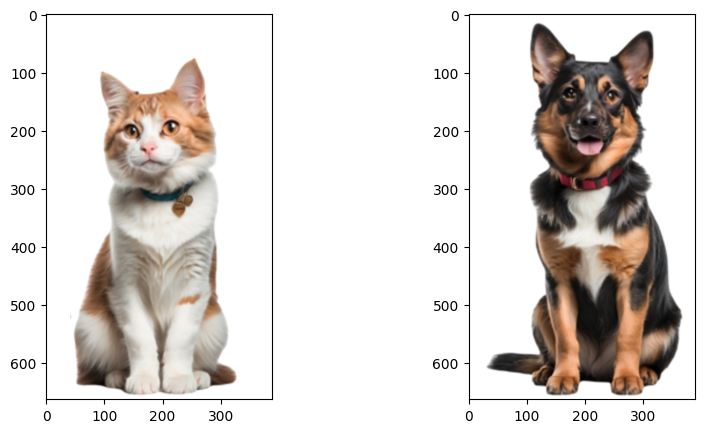

In [ ]:
# 이미지 불러오기 및 그레이스케일 변환
image1 = plt.imread('cat.png')
image2 = plt.imread('dog.png')

# 원본 이미지
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image1)
plt.subplot(122)
plt.imshow(image2)
plt.show()

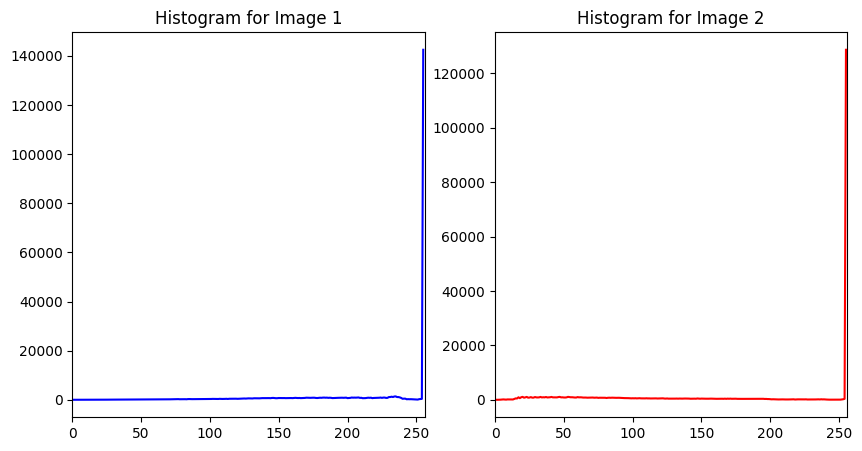

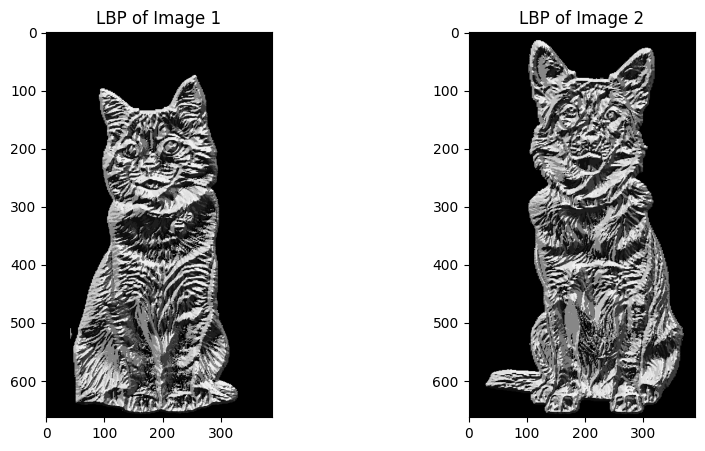

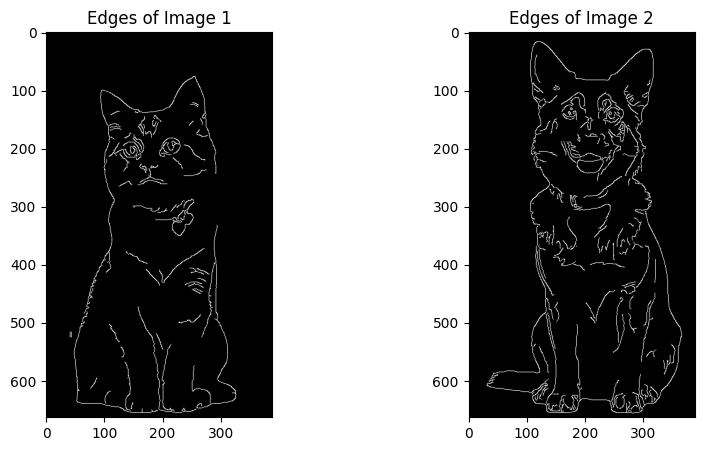

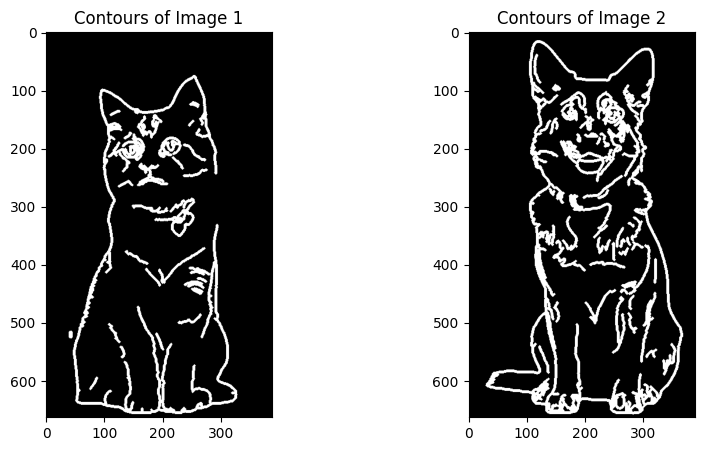

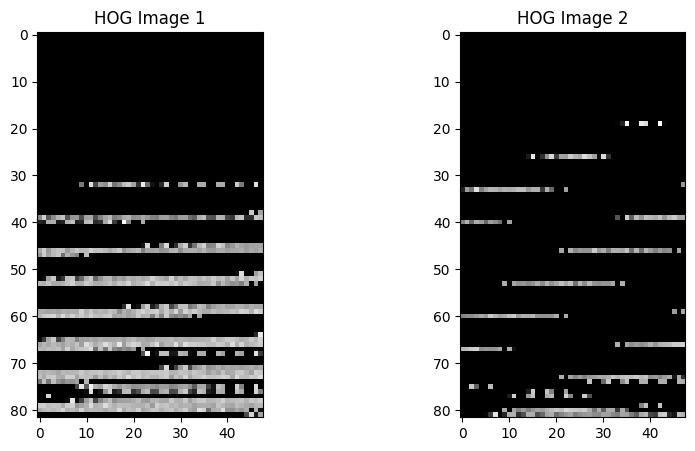

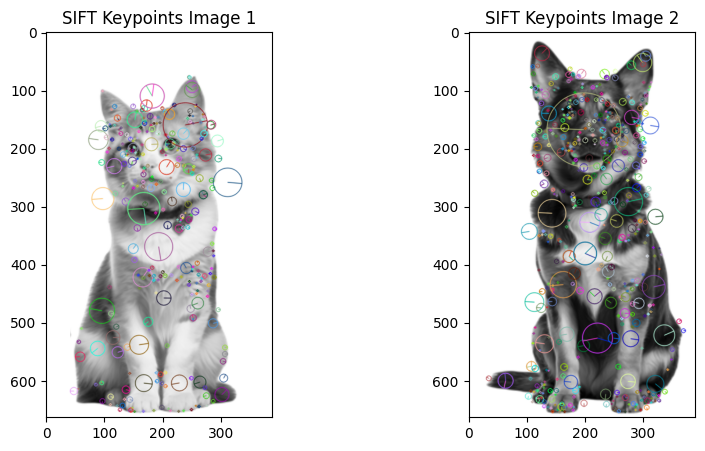

error: OpenCV(4.8.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
# 이미지 불러오기 및 그레이스케일 변환
image1 = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('dog.png', cv2.IMREAD_GRAYSCALE)

# 색상 히스토그램 계산 및 비교
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_histogram(image1, 'Histogram for Image 1', 'blue')
plt.subplot(122)
plot_histogram(image2, 'Histogram for Image 2', 'red')
plt.show()

# 질감 분석
lbp1 = apply_lbp(image1)
lbp2 = apply_lbp(image2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(lbp1, cmap='gray')
plt.title('LBP of Image 1')
plt.subplot(122)
plt.imshow(lbp2, cmap='gray')
plt.title('LBP of Image 2')
plt.show()

# 엣지 검출
edges1 = apply_canny(image1)
edges2 = apply_canny(image2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(edges1, cmap='gray')
plt.title('Edges of Image 1')
plt.subplot(122)
plt.imshow(edges2, cmap='gray')
plt.title('Edges of Image 2')
plt.show()

# 외곽선 추출
contours1 = find_contours(edges1)
contours2 = find_contours(edges2)

contour_image1 = np.zeros_like(image1)
contour_image2 = np.zeros_like(image2)

cv2.drawContours(contour_image1, contours1, -1, (255, 0, 0), 3)
cv2.drawContours(contour_image2, contours2, -1, (255, 0, 0), 3)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(contour_image1, cmap='gray')
plt.title('Contours of Image 1')
plt.subplot(122)
plt.imshow(contour_image2, cmap='gray')
plt.title('Contours of Image 2')
plt.show()

# HOG Features
hog1 = apply_hog(image1)
hog2 = apply_hog(image2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(hog1, cmap='gray')
plt.title('HOG Image 1')
plt.subplot(122)
plt.imshow(hog2, cmap='gray')
plt.title('HOG Image 2')
plt.show()

# SIFT Features
sift1 = apply_sift(image1)
sift2 = apply_sift(image2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(sift1)
plt.title('SIFT Keypoints Image 1')
plt.subplot(122)
plt.imshow(sift2)
plt.title('SIFT Keypoints Image 2')
plt.show()


